In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [6]:
x_train[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Support Vector Machine

#import pandas as pd
#import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 2, gamma = 0.9)

# Train the model by calling a method fit()
svmModel.fit(x_train,y_train)

# Store the predicted values into y_pred
Y_pred = svmModel.predict(x_test)

# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(y_test, Y_pred)*100,2))

x_train_flat=[ x_train[i].flatten() for i in x_train]

x_train_flat.shape

x_train[100].flatten()

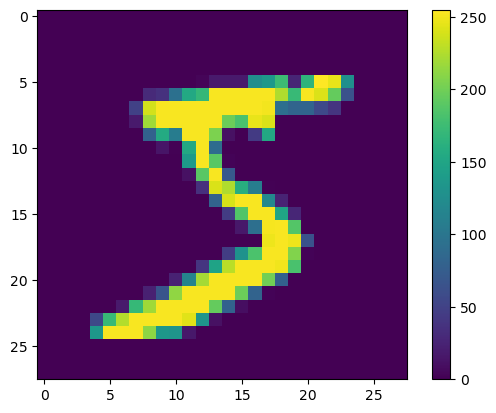

In [15]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
# scale

x_train = x_train / 255.0
x_test = x_test / 225.0

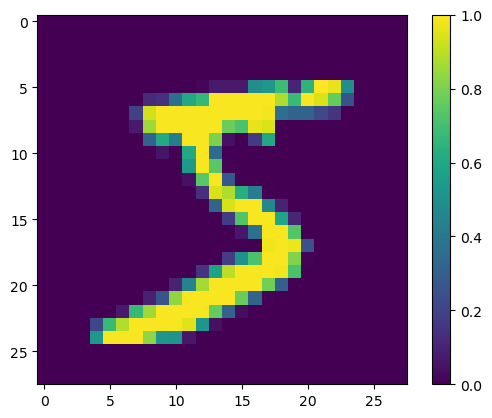

In [17]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

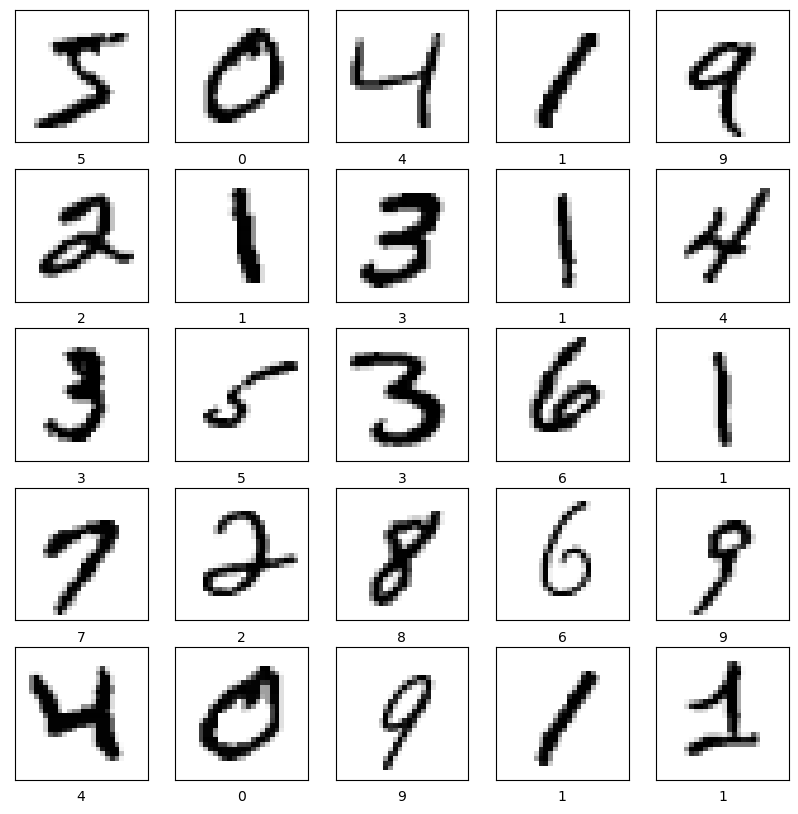

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2535 - accuracy: 0.9279
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0775 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

In [22]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0823 - accuracy: 0.9802 - 517ms/epoch - 2ms/step

Test accuracy: 0.9801999926567078


In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(50),
    keras.layers.Dense(10)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2282 - accuracy: 0.9328
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0980 - accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0344 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0262 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.022

In [26]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1053 - accuracy: 0.9792 - 464ms/epoch - 1ms/step

Test accuracy: 0.979200005531311


In [27]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [29]:
predictions[0]

array([6.8401756e-15, 2.1160222e-12, 7.2823952e-12, 1.5126793e-09,
       3.0040292e-19, 1.1442310e-12, 3.8543544e-18, 1.0000000e+00,
       2.1757767e-15, 1.5687726e-13], dtype=float32)

In [30]:
np.argmax(predictions[0])

7

In [31]:
y_test[0]

7

In [35]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


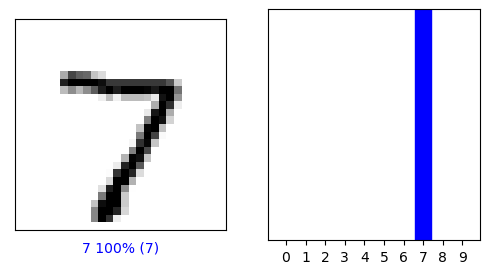

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


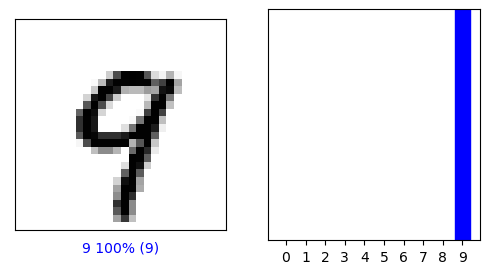

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


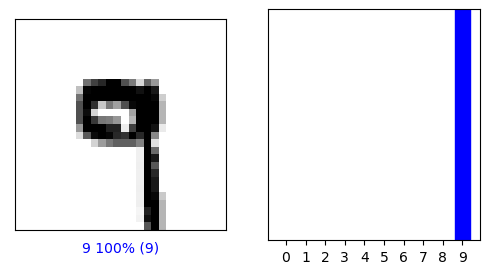

In [38]:
i = 6000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


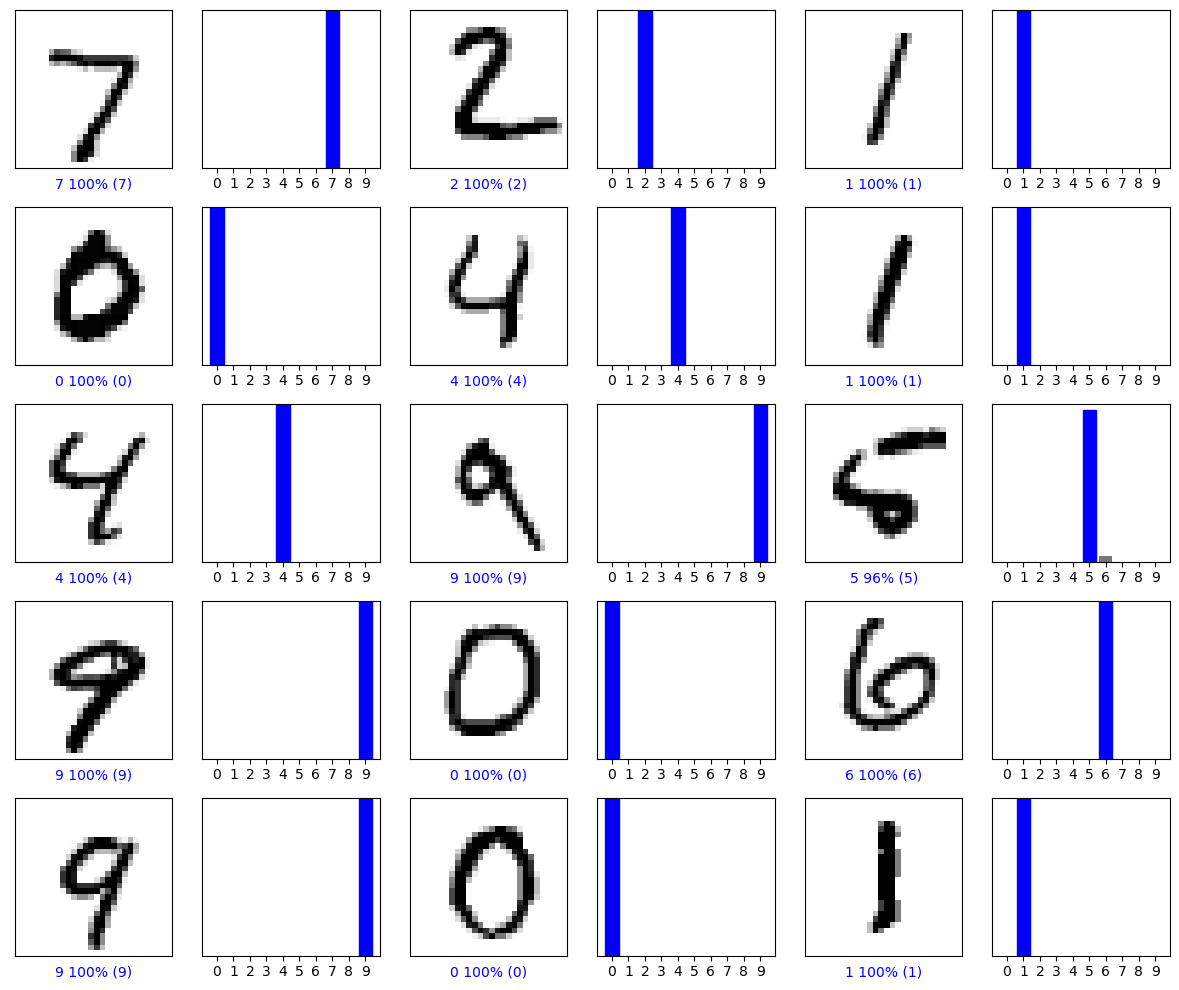

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


In [40]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)

(28, 28)


In [41]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [42]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[7.62866495e-13 1.00701403e-13 1.00000000e+00 9.07667564e-14
  1.00505446e-25 9.76239730e-22 1.45705199e-15 8.50187058e-21
  5.91852197e-13 5.47304424e-26]]


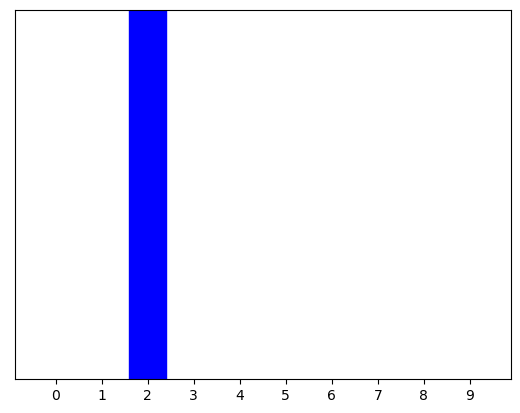

In [44]:
plot_value_array(1, predictions_single[0], y_test)


In [45]:
np.argmax(predictions_single[0])

2

# CNN